# Rabbits and foxes

There are initially 400 rabbits and 200 foxes on a farm (but it could be two cell types in a 96 well plate or something, if you prefer bio-engineering analogies). Plot the concentration of foxes and rabbits as a function of time for a period of up to 600 days. The predator-prey relationships are given by the following set of coupled ordinary differential equations:

\begin{align}
\frac{dR}{dt} &= k_1 R - k_2 R F \tag{1}\\
\frac{dF}{dt} &= k_3 R F - k_4 F \tag{2}\\
\end{align}

* Constant for growth of rabbits $k_1 = 0.015$ day<sup>-1</sup>
* Constant for death of rabbits being eaten by foxes $k_2 = 0.00004$ day<sup>-1</sup> foxes<sup>-1</sup>
* Constant for growth of foxes after eating rabbits $k_3 = 0.0004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* Constant for death of foxes $k_4 = 0.04$ day<sup>-1</sup>

*This problem is based on one from Chapter 1 of H. Scott Fogler's textbook "Essentials of Chemical Reaction Engineering".*


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

# Now let's try some Kinetic Monte Carlo

We wish to implement a Kinetic Monte Carlo algorithm to simulate the same situation. See https://en.wikipedia.org/wiki/Kinetic_Monte_Carlo for details.

We'll assume the numbers of rabbits and foxes (starting at 400 and 200) are actual rabbits and foxes, not "rabbit densities" for example, and so must always remain integers: you can't have half a rabbit or half a fox.

There are four events, with rates that are straightforward to calculate, so the rejection-free algorithm is suitable:
* `rabbit_birth = k1 * rabbits`
* `rabbit_death = k2 * rabbits * foxes`
* `fox_birth = k3 * rabbits * foxes`
* `fox_death = k4 * foxes`


Use a Kinetic Monte Carlo simulation(s) running for 600 days to determine
1. The expected location of the second peak in foxes (eg. 425 days, 2800 foxes), on occasions that there is one (eg. if there's a peak that's  >200 days and >100 foxes)
2. The interquartile range of the second peak in foxes (eg. 411-443 days, 2700-3120 foxes).
3. The probability that the foxes die out before 600 days are complete

Make sure you've done enough simulations to be suitably confident in your answers (given the precision you think appropriate).

# Your turn!

In [2]:
# https://www.le.ac.uk/users/rjm1/cotter/page_38.htm
# https://stackoverflow.com/questions/8592048/is-random-expovariate-equivalent-to-a-poisson-process
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
# https://www.youtube.com/watch?v=OgO1gpXSUzU
# I spent many hours looking at the tips and watching a lecture on video in Kinetic Monte Carlo and then trying to 
# follow your solution, but there are still parts I am not completely clear how it works.
import random
# Variables that stand for the four constants given in the problem statement
k1 = 0.015
k2 = 0.00004
k3 = 0.0004
k4 = 0.04
# Period of time
end_time = 600
# Fixing seed so results don't change every time code is executed, considering random is exactly what it suggests...
random.seed(1) 
np.random.seed(1) 

# Function to find the rates of the four events that can happen
def find_rates(rabbits, foxes):
    rabbit_birth = k1 * rabbits
    rabbit_death = k2 * rabbits * foxes
    fox_birth = k3 * rabbits * foxes
    fox_death = k4 * foxes
    
    return(rabbit_birth, rabbit_death, fox_birth, fox_death)




In [3]:
# Starting an initial condition and setting counters
all_dead = 0 
dead_foxes = 0
runs = 1000

# Creating lists to hold the time values and the foxes second peak.
times_second_peak = []
foxes_second_peak = []
#Creating arrays for quartiles and mean times
mean_times = np.zeros(runs)
mean_foxes = np.zeros(runs)
times_higher_quartile = np.zeros(runs)
times_lower_quartile = np.zeros(runs)
foxes_higher_quartile = np.zeros(runs)
foxes_lower_quartile = np.zeros(runs)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

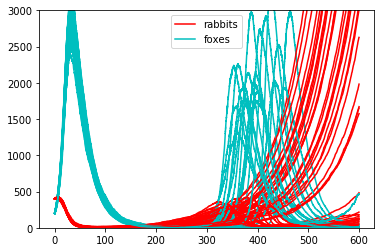

Everything died 18 times out of 1000 or 1.8%
Foxes died 708 times out of 1000 or 70.8%


In [4]:
# For loop in the number of runs specified
for run in range(runs):
    # Print statement to check if the program is computing, since it takes a long time to process.
    print('.', end = '')
    # Setting the initial time and initial number of foxes and rabbits
    time = 0
    rabbit = 400
    fox = 200
    times = []
    rabbits = []
    foxes = []
    # Loop as long time is smaller than 600 (specified period of time) and adding units of foxes, rabbits and time
    # to their lists.
    while time < end_time:
        times.append(time)
        rabbits.append(rabbit)
        foxes.append(fox)
        
        (rabbit_birth, rabbit_death, fox_birth, fox_death) = rates = find_rates(rabbit, fox)
        # Variable holding the sum of the rates
        sum_rates = sum(rates)
        # Conditional in case the total sum of rates is 0.
        if sum_rates == 0:
            # Adding one to the all_dead count
            all_dead +=1
            times.append(end_time)
            rabbits.append(rabbit)
            foxes.append(fox)
            # So loop does not continue if sum of the rates is equal to 0.
            break
        # Exponentially distributed random floating point numbers. 
        wait_time = random.expovariate(sum_rates)
        time += wait_time
        # Draw samples from a uniform distribution.
        # Choosing random events between 0 and the sum of the rates
        choice = random.uniform(0, sum_rates)
        # substracting a fox birth from the choice
        # Checking foxes as they change faster than rabbits
        choice -= fox_birth
        # Conditionals to check for different choice scenarios
        if choice < 0:
            # Fox born
            fox += 1
            # Statement to continue the loop
            continue
        choice -= fox_death
        if choice < 0:
            # Fox death
            fox -= 1
            if fox == 0:
                dead_foxes += 1
            continue
            
        if choice < rabbit_birth:
            # Rabbit born
            rabbit += 1 
            continue
        # Rabbit death
        rabbit -= 1
    # Converting the lists created to arrays
    times = np.array(times)
    rabbits = np.array(rabbits)
    foxes = np.array(foxes)
    
    # Slicing the arrays to show times bigger than 200 and the cases where there is more than 100 foxes.
    second_peak_index = np.argmax(foxes*(times>200)*(foxes>100))
    if second_peak_index:
        # Adding the values to the list
        times_second_peak.append(times[second_peak_index])
        foxes_second_peak.append(foxes[second_peak_index])
    if len(times_second_peak) > 0:
        mean_times[run] = np.mean(times_second_peak)
        mean_foxes[run] = np.mean(foxes_second_peak)
        # finding the blower and higher qeartiles and assignig tl the arrays
        times_higher_quartile[run] = np.percentile(times_second_peak, 75)
        foxes_higher_quartile[run] = np.percentile(foxes_second_peak, 75)
        times_lower_quartile[run] = np.percentile(times_second_peak, 25)
        foxes_lower_quartile[run] = np.percentile(foxes_second_peak,25)
    # Checking a few lines to see how it looks like
    if run < 50:
        plt.plot(times, rabbits, 'r')
        plt.plot(times, foxes, 'c')
# Adding a legend in a great position.
plt.legend(['rabbits','foxes'],loc="best") 
plt.ylim(0,3000)
plt.show()

print("Everything died {} times out of {} or {:.1f}%".format(all_dead, runs, 100*all_dead/runs))
print("Foxes died {} times out of {} or {:.1f}%".format(dead_foxes, runs, 100*dead_foxes/runs))

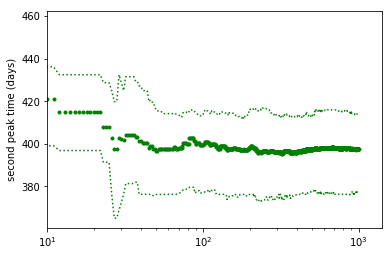

Second peak (days) is 397.6 with IQR [377.7-413.9]


In [5]:
# Plotting the mean of foxes and the lower and higher quartiles.
plt.semilogx(mean_times, 'g.')
plt.semilogx(times_higher_quartile, ':g')
plt.semilogx(times_lower_quartile, ':g')
plt.ylabel('second peak time (days)')
plt.xlim(10)
plt.show()
print("Second peak (days) is {:.1f} with IQR [{:.1f}-{:.1f}]".format(mean_times[-1], times_lower_quartile[-1], times_higher_quartile[-1]))


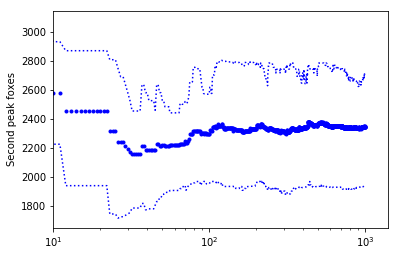

Second peak (foxes) is 2347.2 with IQR [1933.5-2689.5] 


In [6]:
# Plotting the mean of foxes and the lower and higher quartiles.
plt.semilogx(mean_foxes,'b.')
plt.semilogx(foxes_higher_quartile,':b')
plt.semilogx(foxes_lower_quartile,':b')
plt.ylabel('Second peak foxes')
plt.xlim(10)
plt.show()
print("Second peak (foxes) is {:.1f} with IQR [{:.1f}-{:.1f}] ".format(mean_foxes[-1], foxes_lower_quartile[-1], foxes_higher_quartile[-1]))


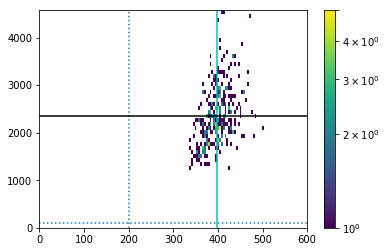

In [7]:
# Creating a histogram showing  the foxes second peak and the times
# Followed the histogram shown in the other document given.
from matplotlib.colors import LogNorm
plt.hist2d(times_second_peak, foxes_second_peak, bins=40, norm=LogNorm())
plt.xlim(0,600)
plt.ylim(0)
plt.colorbar()
plt.axvline(200,linestyle=':')
plt.axvline(mean_times[-1],color='c')
plt.axhline(100,linestyle=':')
plt.axhline(mean_foxes[-1],color='k')
plt.show()
